In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pymannkendall as mk

In [15]:
# Ler o arquivo CSV
df = pd.read_csv(r"C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\dados_de_entrada\SC.csv", sep=';', encoding='latin1')

# Converter a coluna 'Valor' para numérico
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

# Lista de poluentes a serem analisados
poluentes = ['MP10', 'PTS', 'SO2', 'NO2']

codigos_estacoes = df['Codigo'].unique()  # Obtém códigos únicos diretamente do DataFrame

# Criar um dicionário para armazenar DataFrames filtrados para cada estação
filtred_dataframes = {}

# Iterar sobre cada código de estação único
for codigo_estacao in codigos_estacoes:
    # Filtrar dados para a estação atual e os poluentes desejados
    filtred_df = df.loc[
        (df['Codigo'] == codigo_estacao) &
        (df['Poluente'].isin(poluentes))
    ]


    # Verificar se o DataFrame não está vazio
    if not filtred_df.empty:
        # Criar a coluna 'Date'
        filtred_df['Date'] = filtred_df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(
            lambda x: datetime(x['Ano'], x['Mes'], x['Dia'], x['Hora'], x['Minuto']), axis=1
        )

        # Definir 'Date' como índice
        filtred_df = filtred_df.set_index('Date')

        # Selecionar colunas desejadas
        filtred_df = filtred_df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto', 'Codigo', 'Poluente', 'Valor', 'Unidade']]

        # Adicionar coluna do dia da semana
        filtred_df['Dia_da_Semana'] = filtred_df.index.day_name(locale='pt_BR').str[:3]

        # Armazenar o DataFrame no dicionário
        filtred_dataframes[codigo_estacao] = filtred_df

C:\Users\najuw\AppData\Local\Temp\ipykernel_23300\141111117.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_df['Date'] = filtred_df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(
C:\Users\najuw\AppData\Local\Temp\ipykernel_23300\141111117.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_df['Date'] = filtred_df[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].apply(
C:\Users\najuw\AppData\Local\Temp\ipykernel_23300\141111117.py:27: SettingWithCopyWarning: 
A value is trying to be set on a c

## Análise da série temporal utilizando um lineplot: 

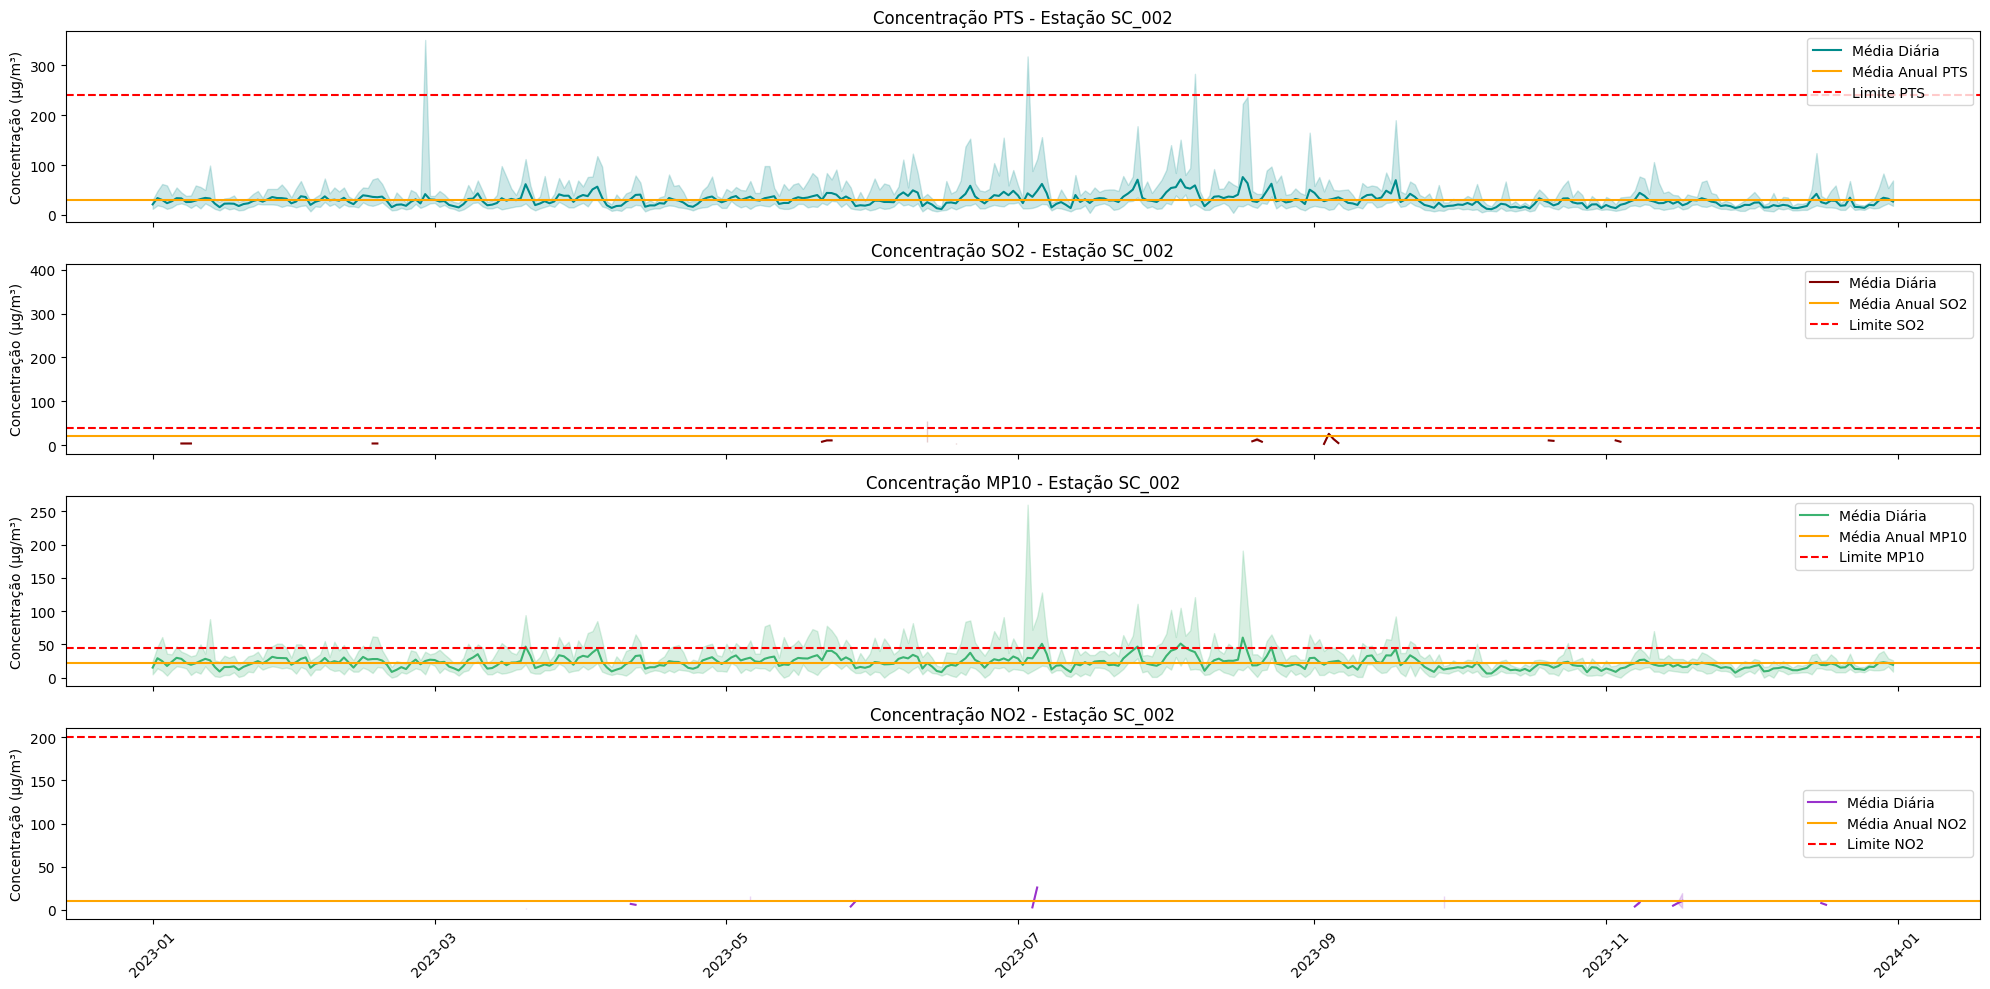

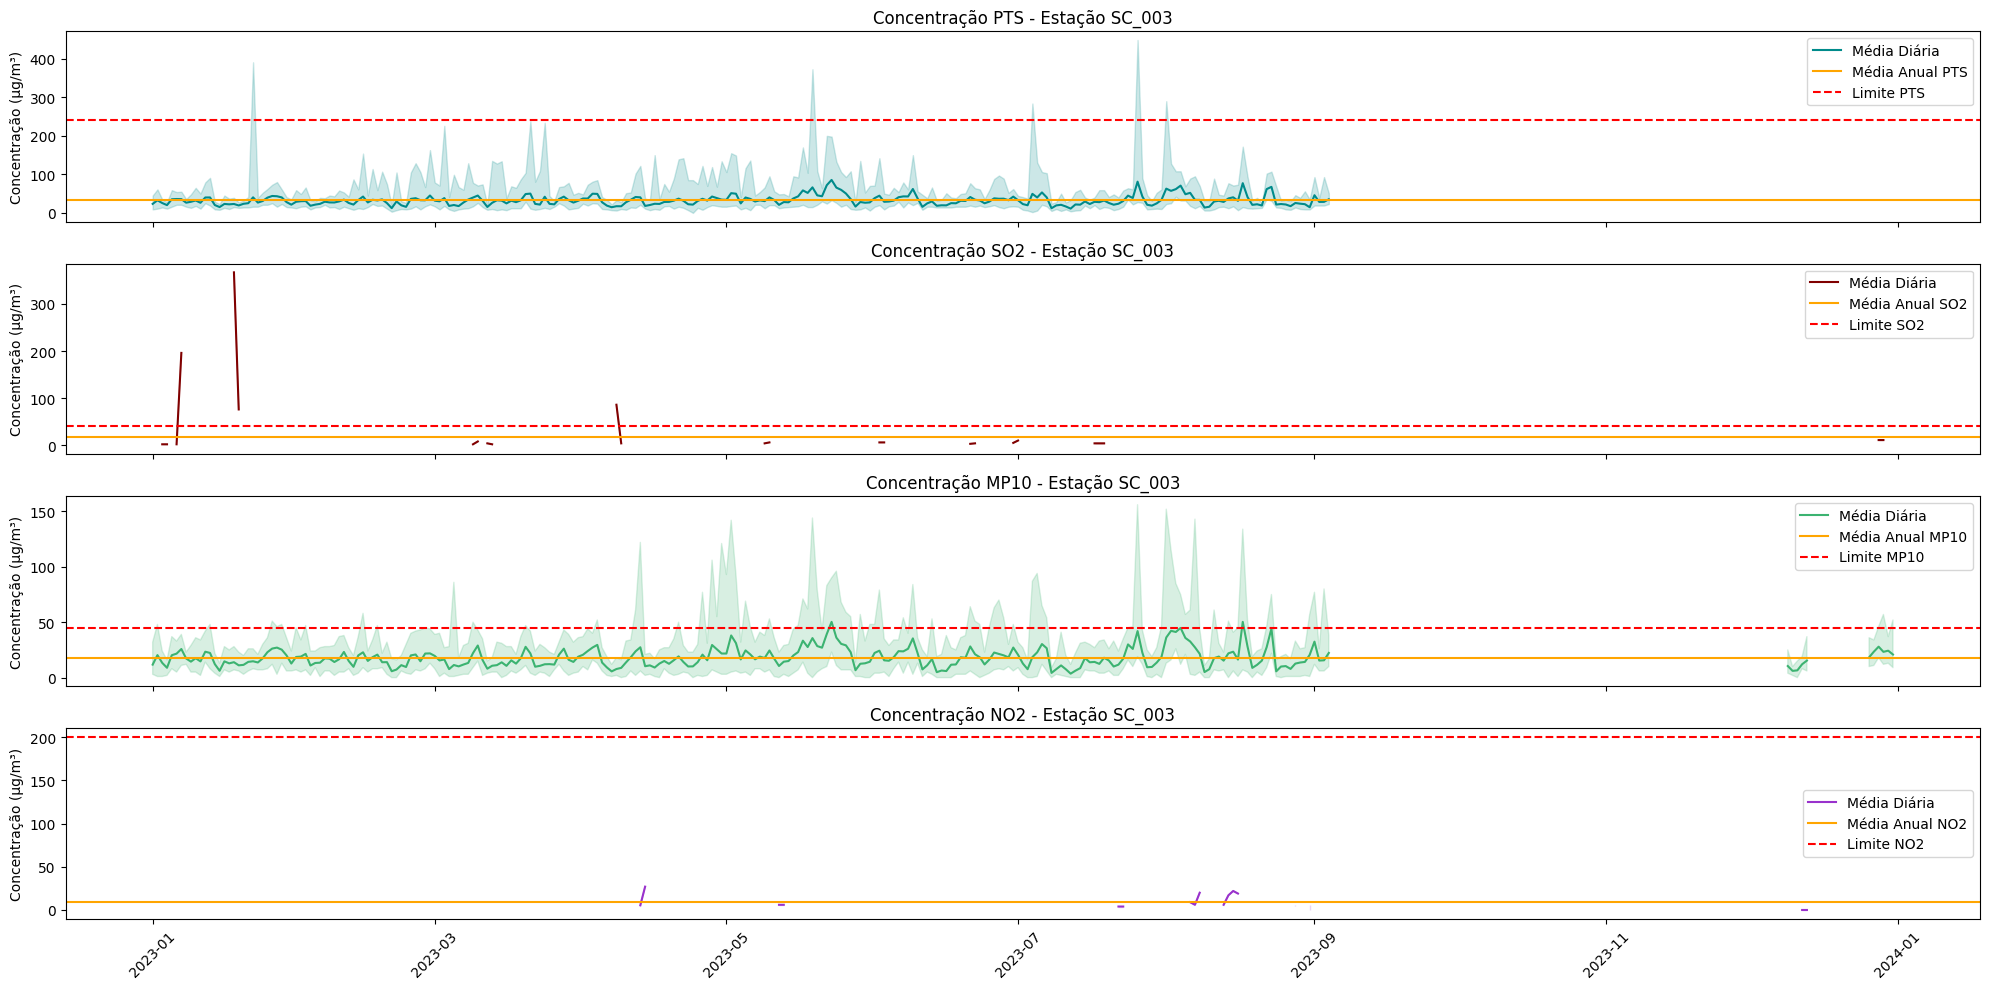

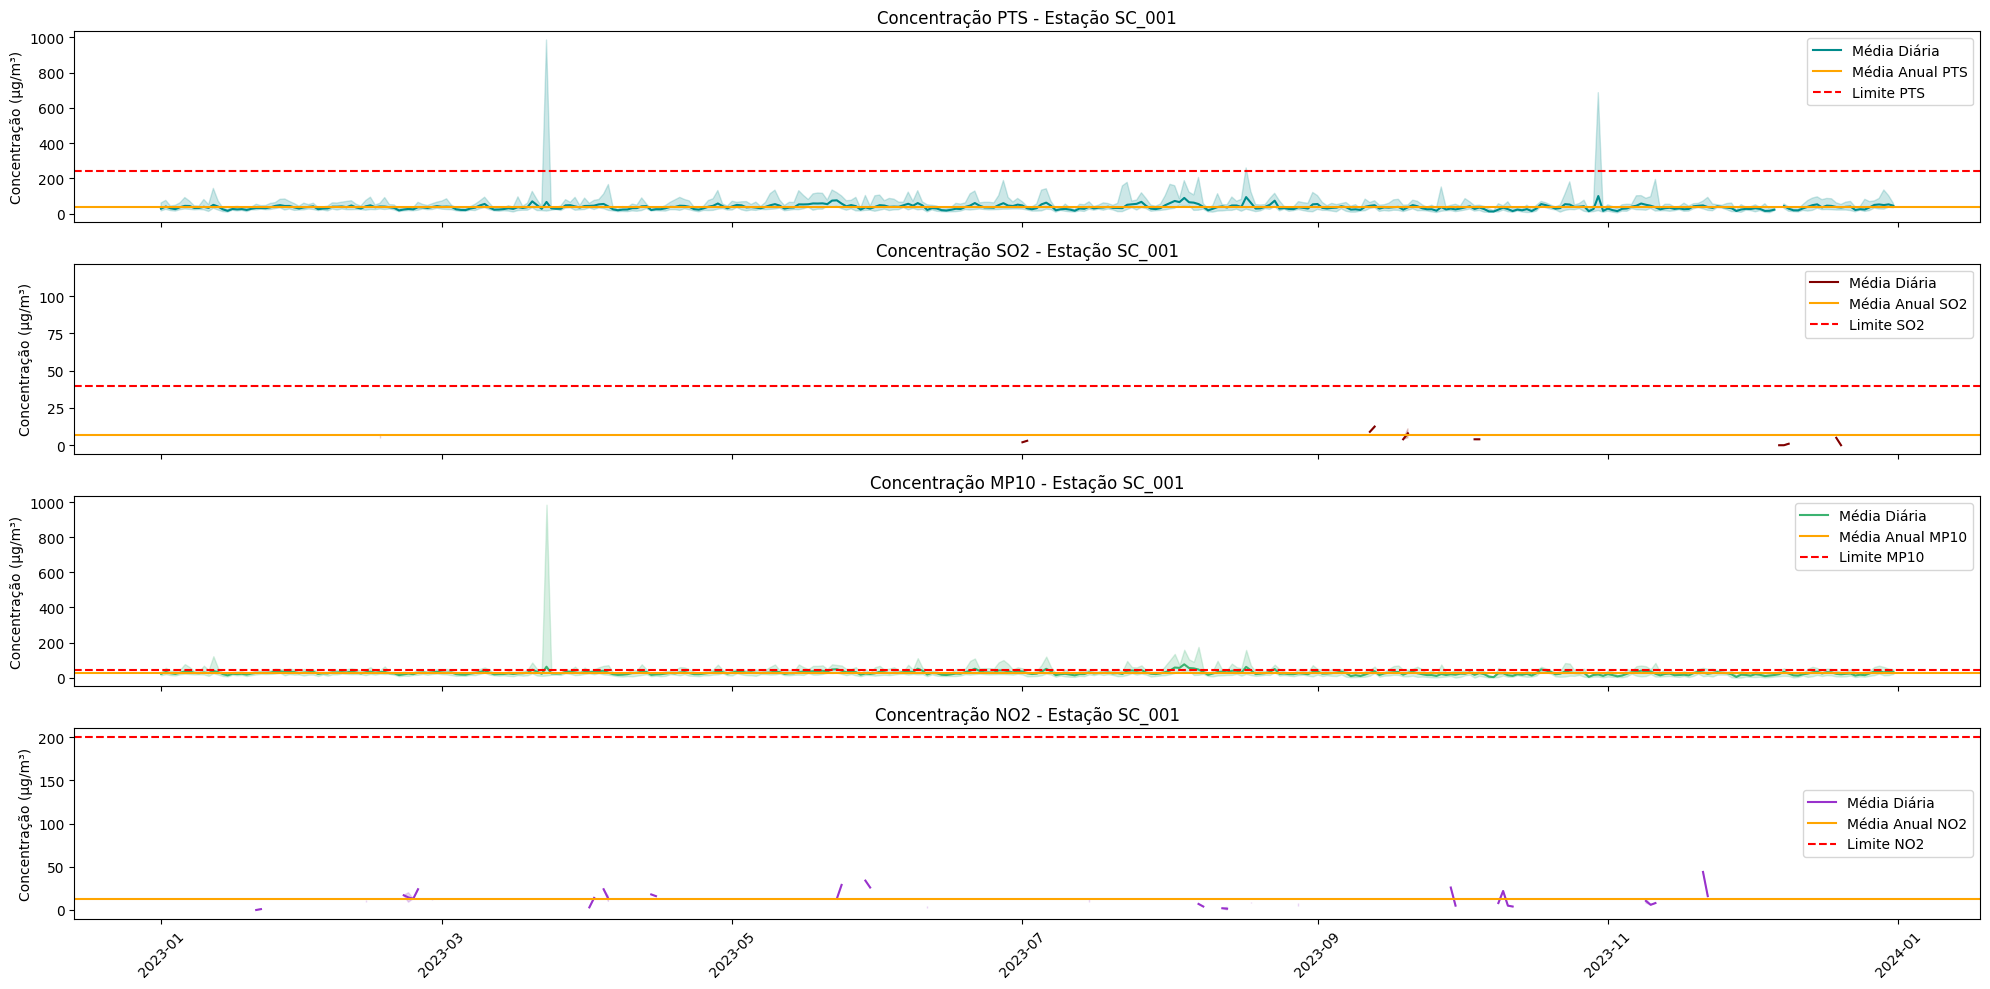

In [16]:
# Lista de poluentes a serem analisados
poluentes = {
    "PTS": ('#008B8B', 240, 'µg/m³'),
    "SO2": ('#800000', 40, 'µg/m³'),
    "MP10": ('#3CB371', 45, 'µg/m³'),
    "NO2": ('#9932CC', 200, 'µg/m³')
}

# Gerando gráficos para cada estação
for codigo_estacao, df_estacao in filtred_dataframes.items():
    fig, ax = plt.subplots(len(poluentes), 1, sharex=True, figsize=(20, 10))

    for i, (poluente, (color, limite, unidade)) in enumerate(poluentes.items()):
        dff = df_estacao.query(f'Poluente == "{poluente}"')

        if not dff.empty:
            # Agregando dados
            media_diaria = dff['Valor'].resample('D').mean()
            min_diaria = dff['Valor'].resample('D').min()
            max_diaria = dff['Valor'].resample('D').max()
            media_anual = dff['Valor'].resample('YE').mean().iloc[-1]
            
            # Plotando a média diária
            ax[i].plot(media_diaria.index, media_diaria, color=color, label='Média Diária')
            ax[i].fill_between(media_diaria.index, min_diaria, max_diaria, color=color, alpha=0.2)
            
            # Plotando a média anual como uma linha horizontal
            ax[i].axhline(y=media_anual, color='orange', linestyle='-', label=f'Média Anual {poluente}')
            
            # Plotando limite
            ax[i].axhline(y=limite, color='red', linestyle='--', label=f'Limite {poluente}')
            
            ax[i].set_title(f'Concentração {poluente} - Estação {codigo_estacao}')
            ax[i].set_ylabel(f'Concentração ({unidade})')
            ax[i].legend()

    # Ajustando o eixo
    ax[-1].tick_params(axis='x', rotation=45)
    plt.tight_layout()

    # Salvando os gráficos como JPEG
    plt.savefig(f'C:\\Users\\najuw\\OneDrive\\Documentos\\GitHub\\ENS410064\\2024\\figuras2\\{codigo_estacao}_concentracoes.jpg', format='jpeg', dpi=300)
    

plt.show()


##  Análise da série temporal através de um boxplot (série toda e agregando períodos):

C:\Users\najuw\AppData\Local\Temp\ipykernel_23300\4195352151.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


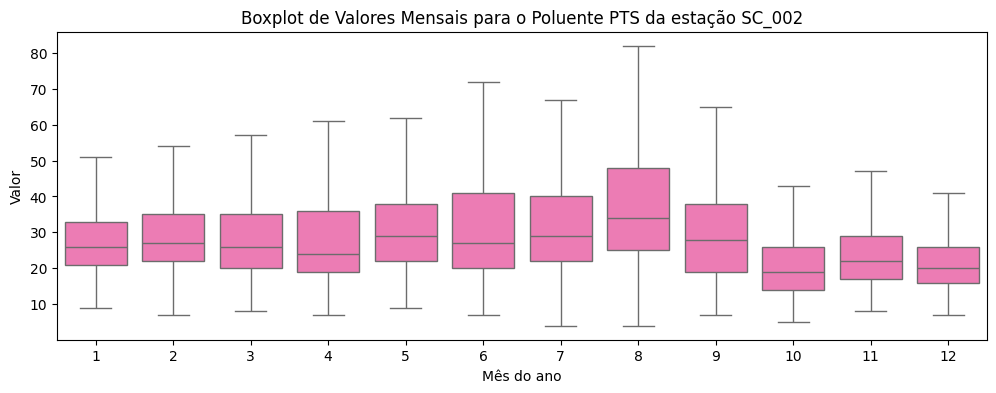

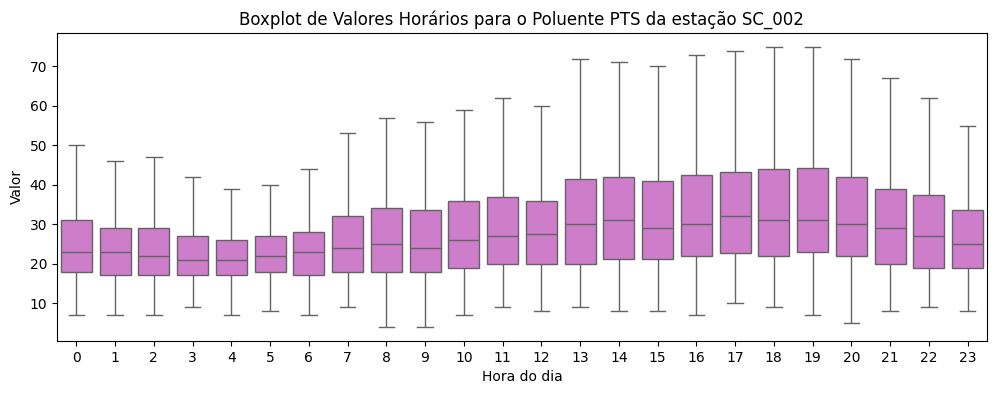

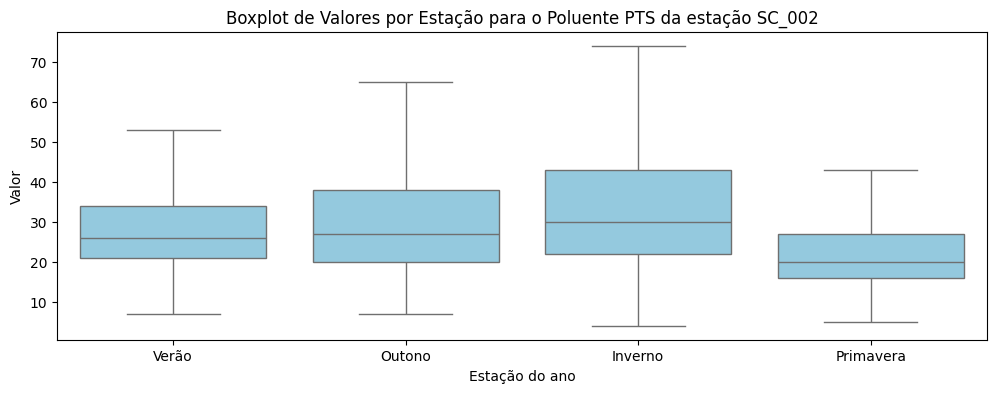

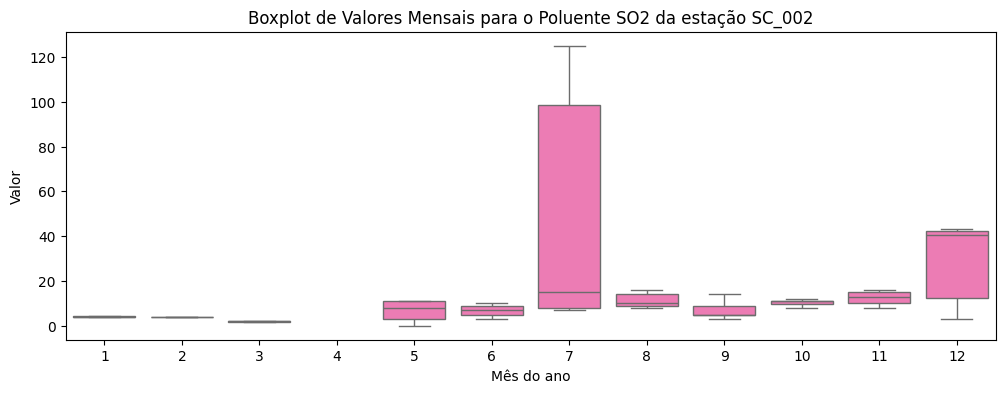

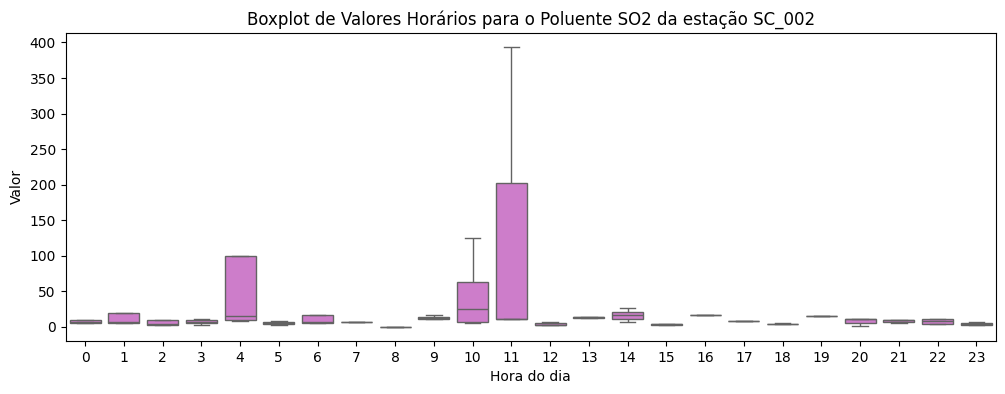

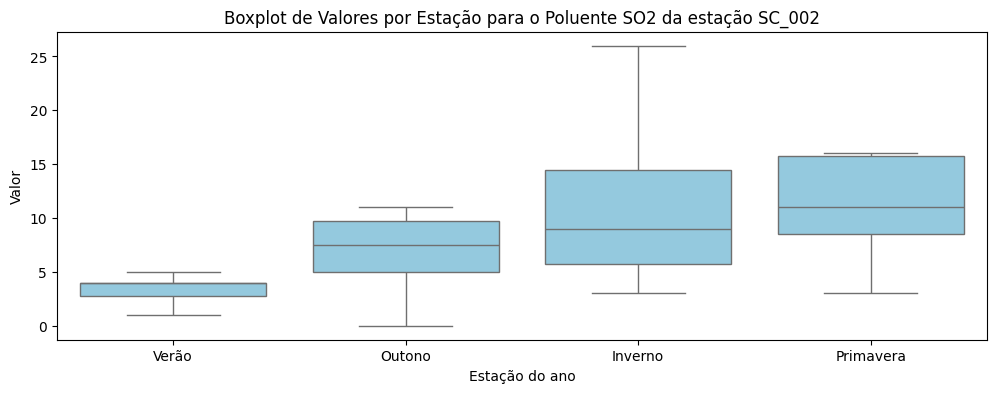

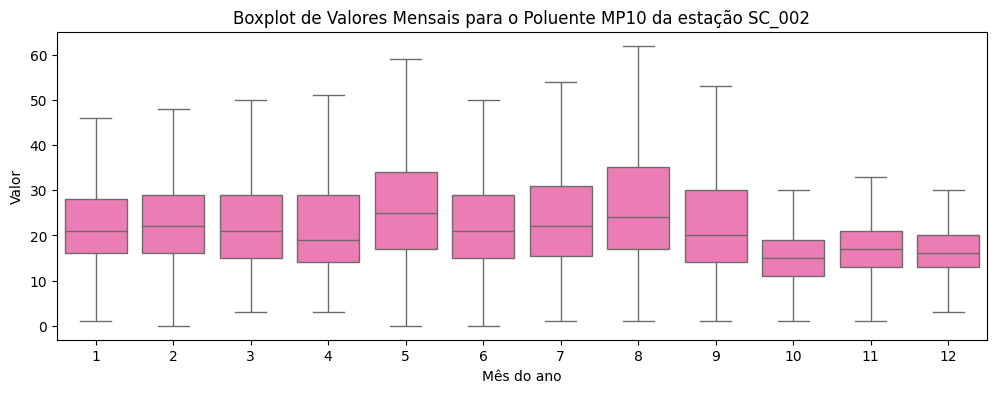

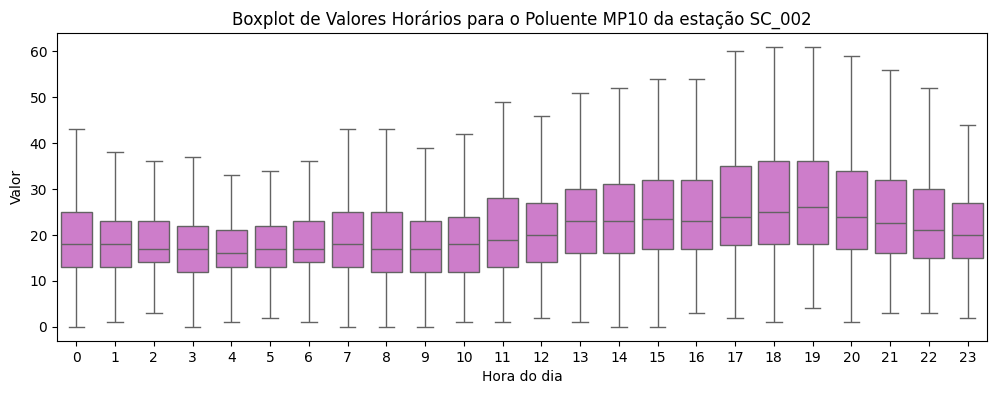

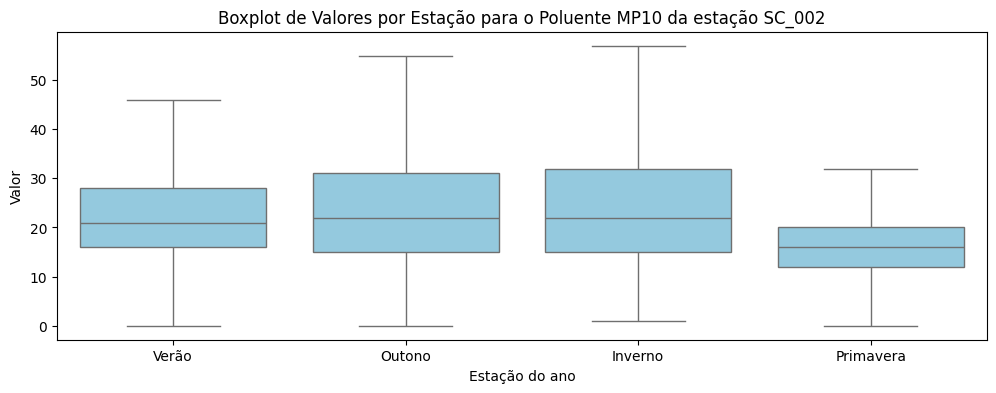

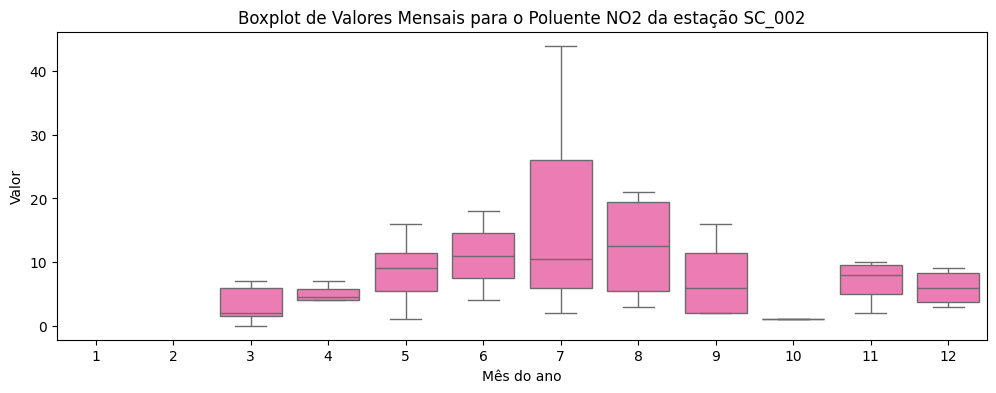

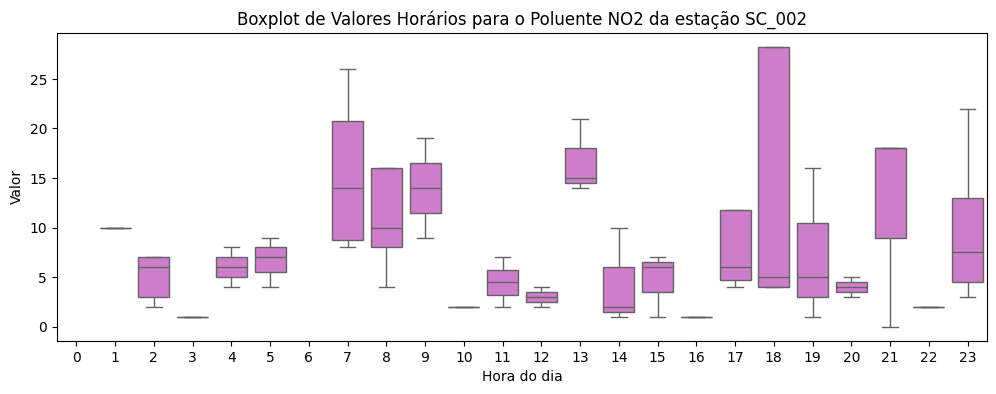

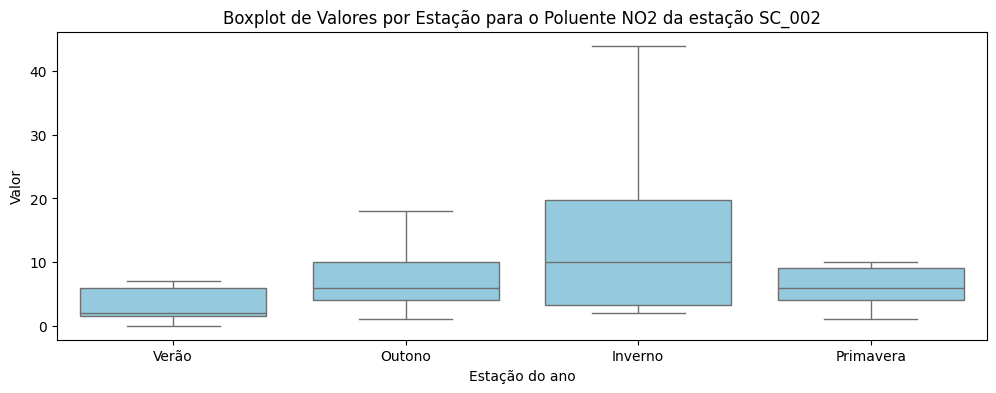

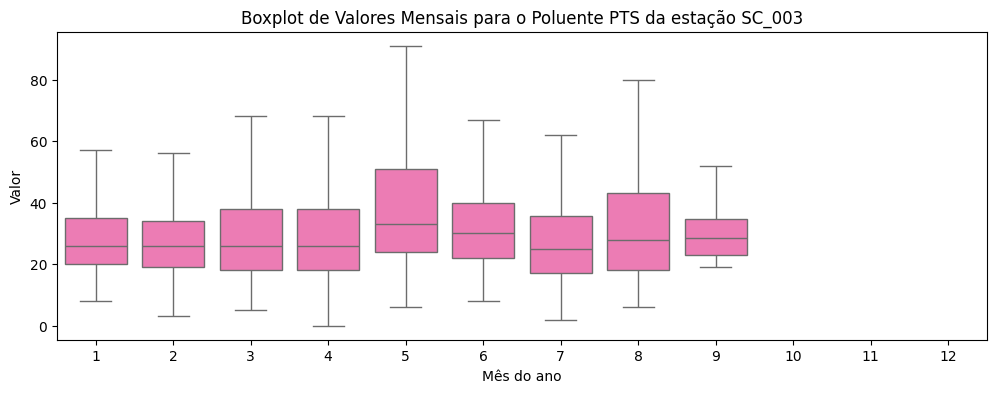

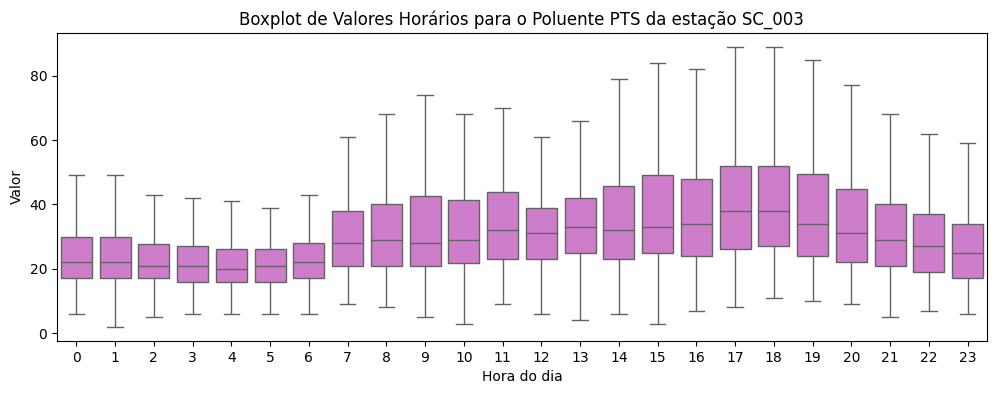

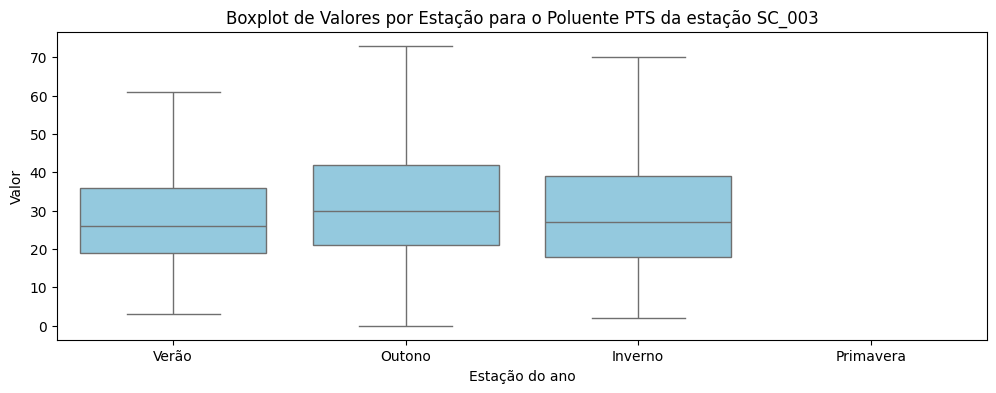

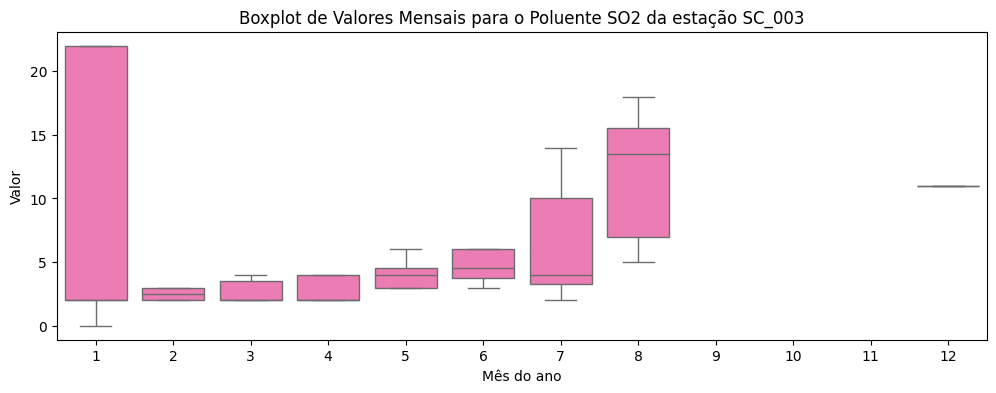

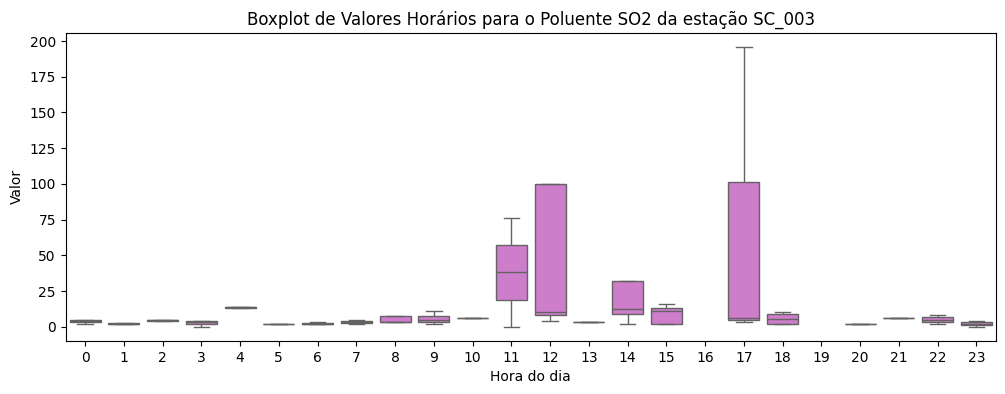

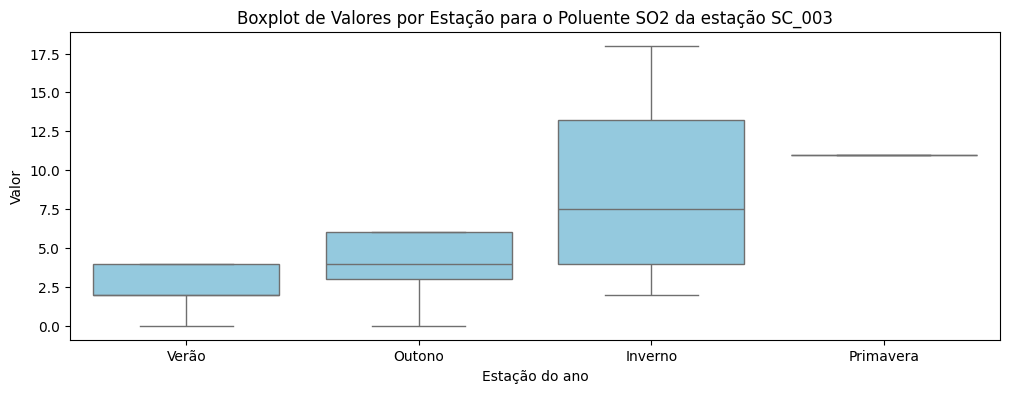

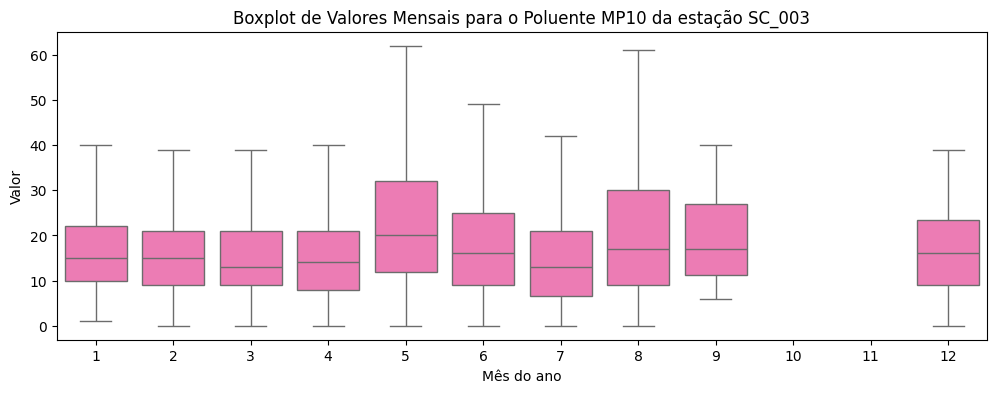

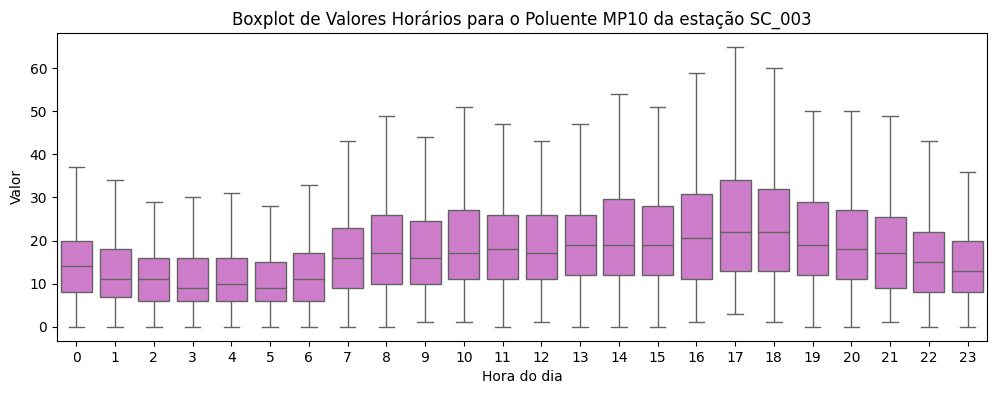

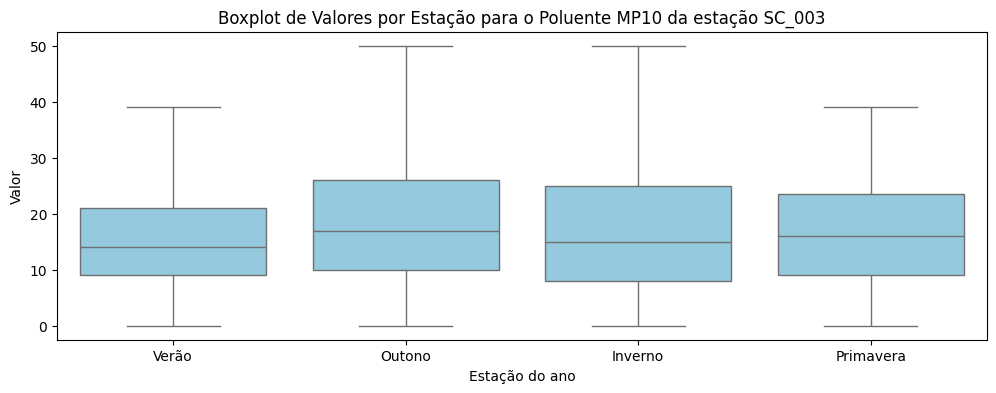

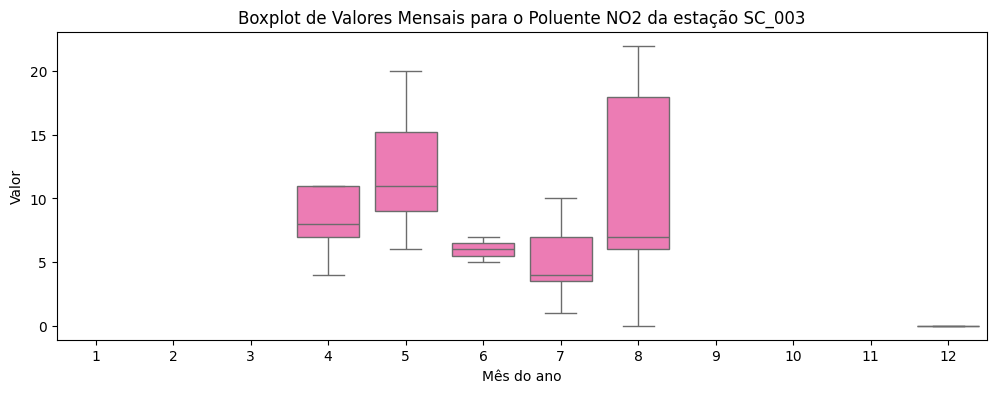

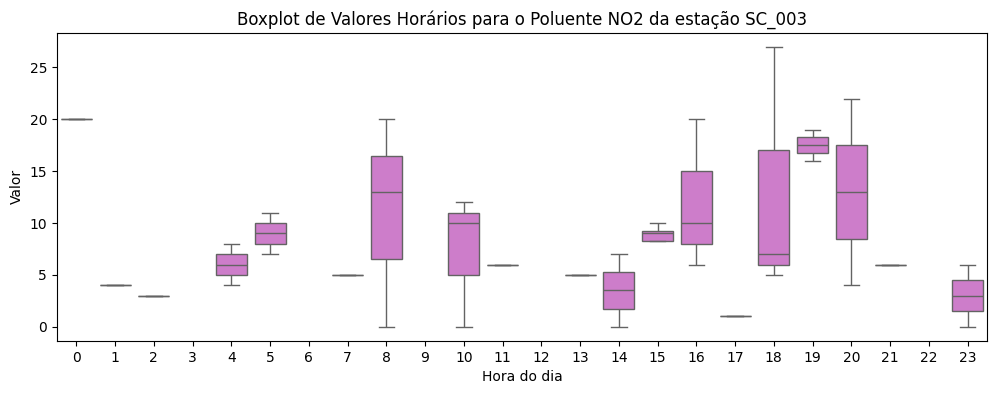

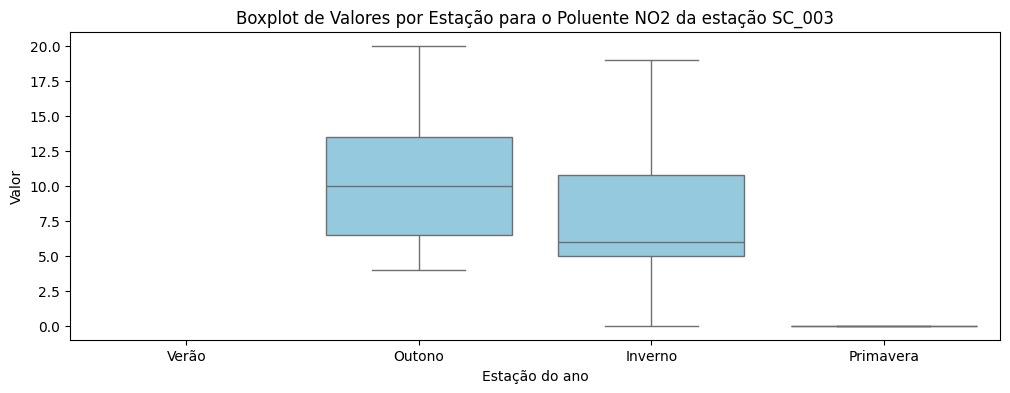

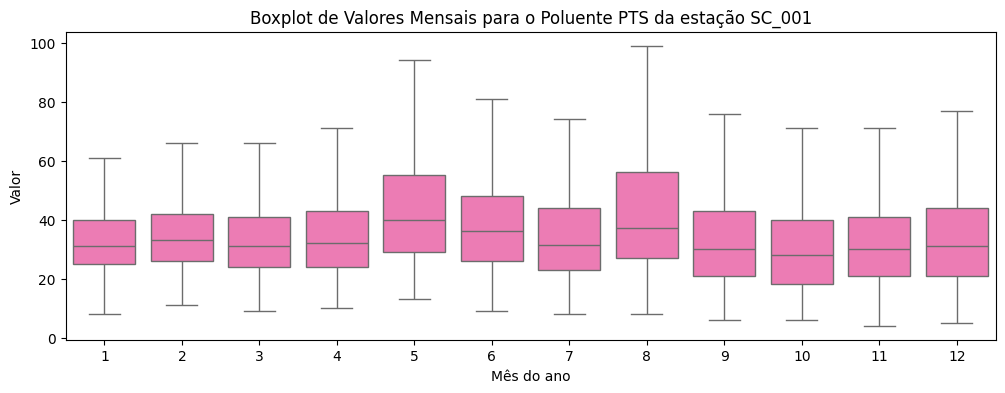

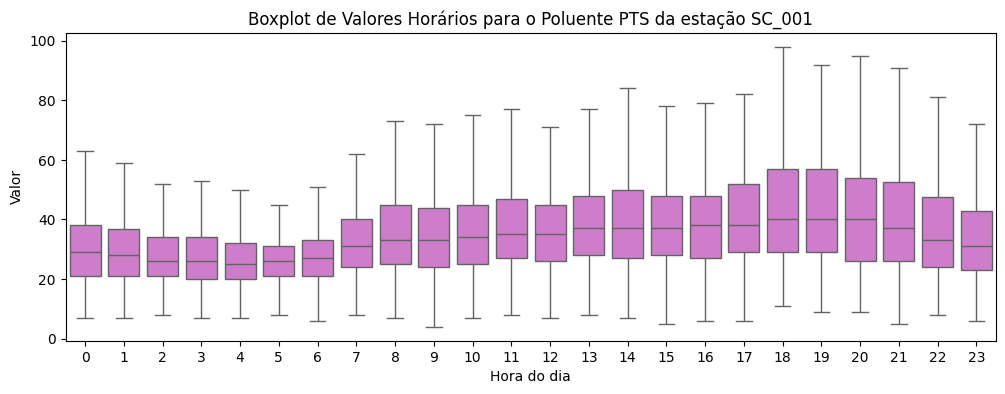

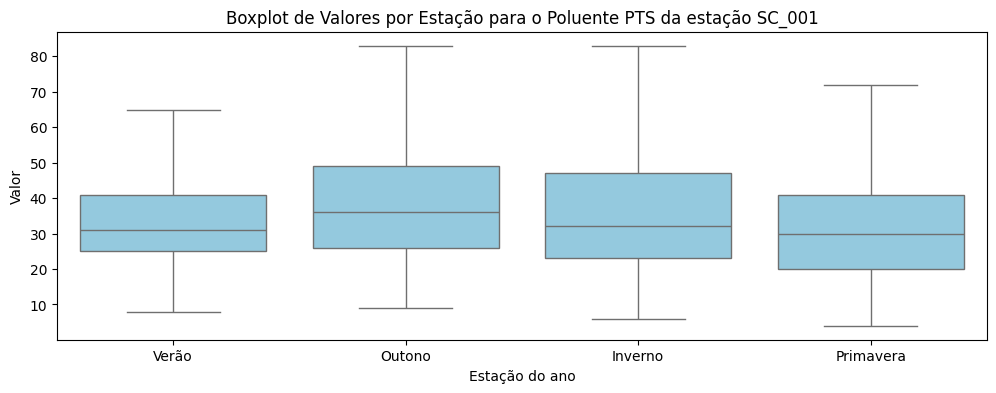

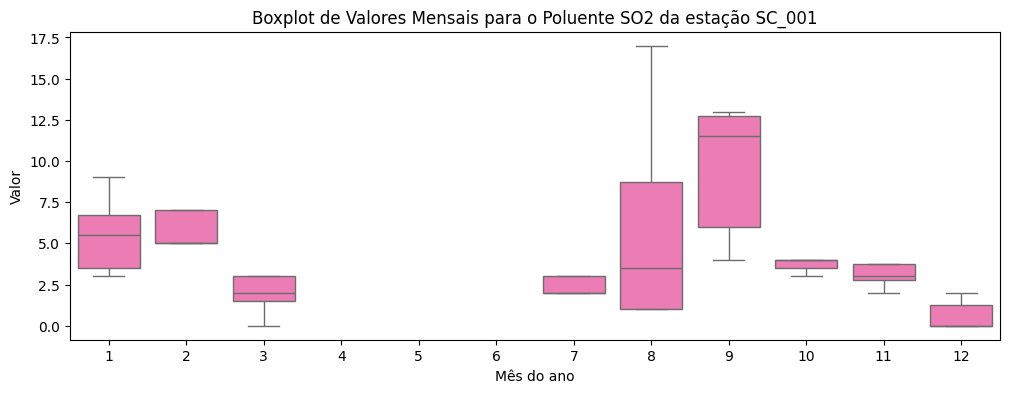

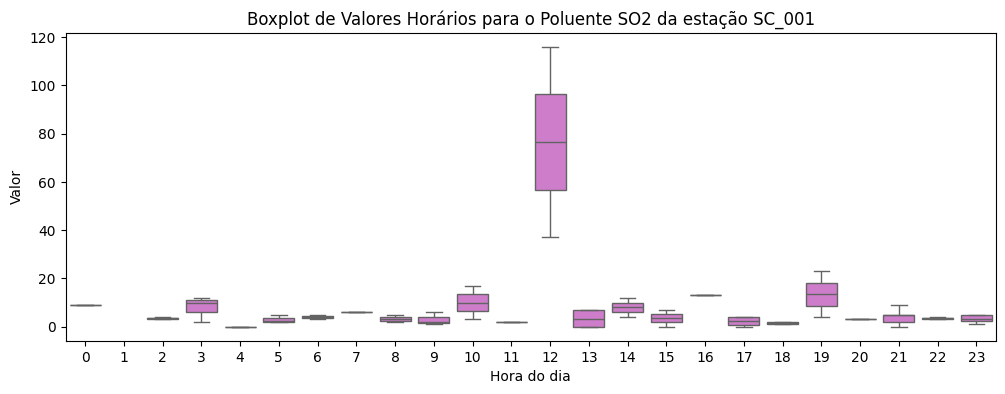

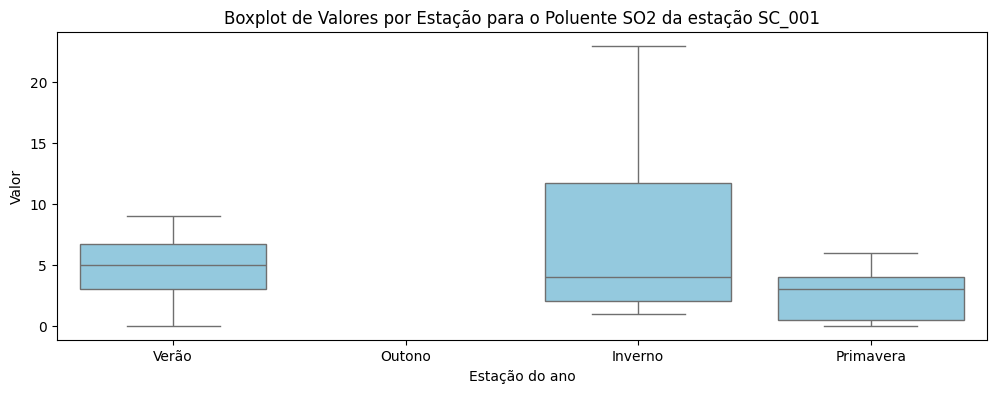

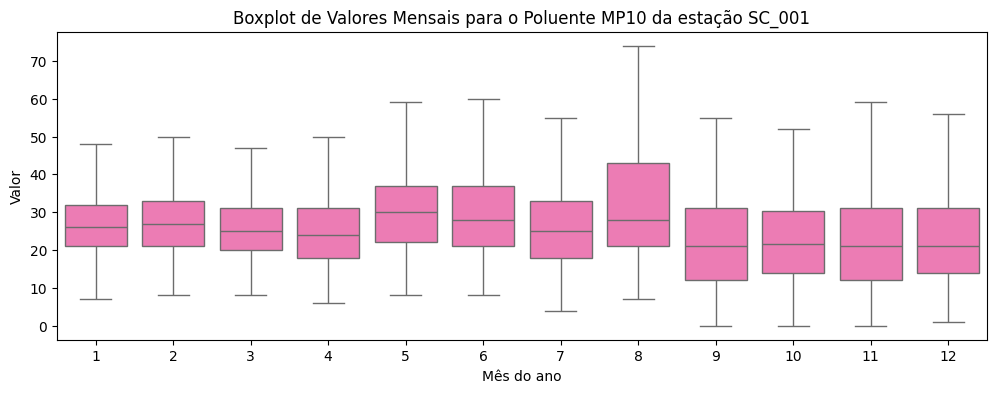

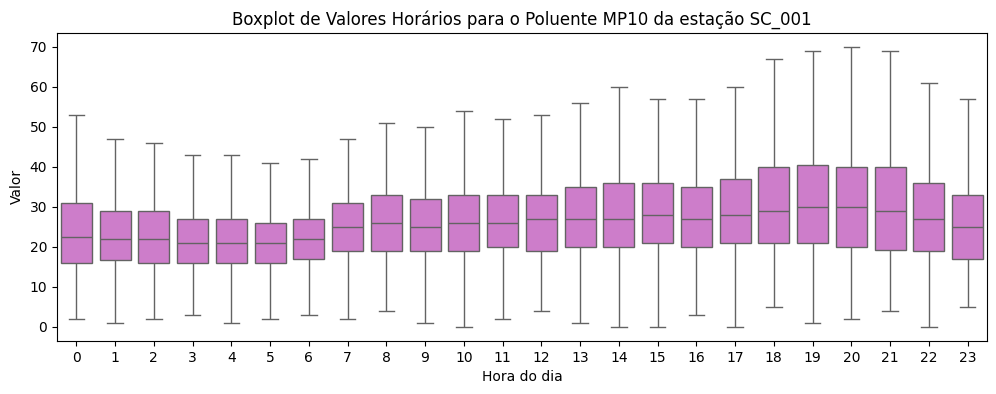

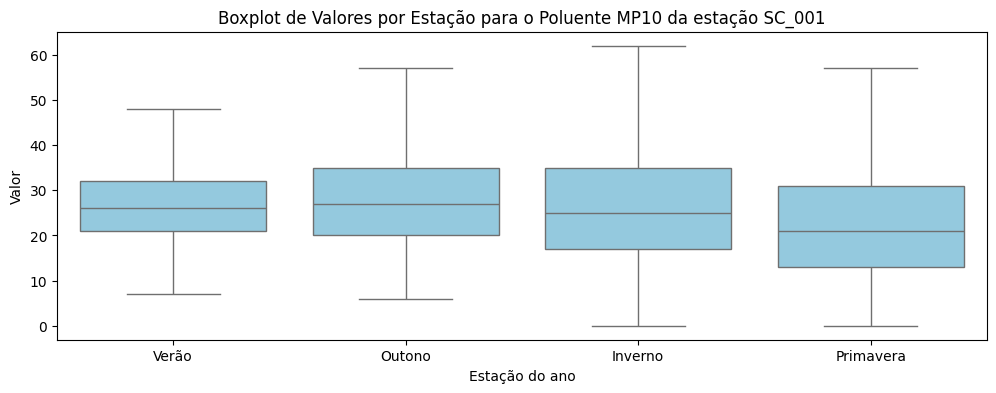

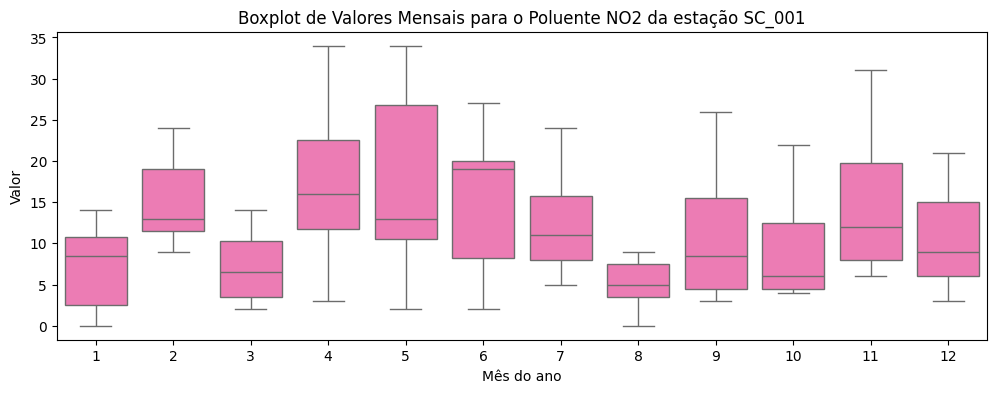

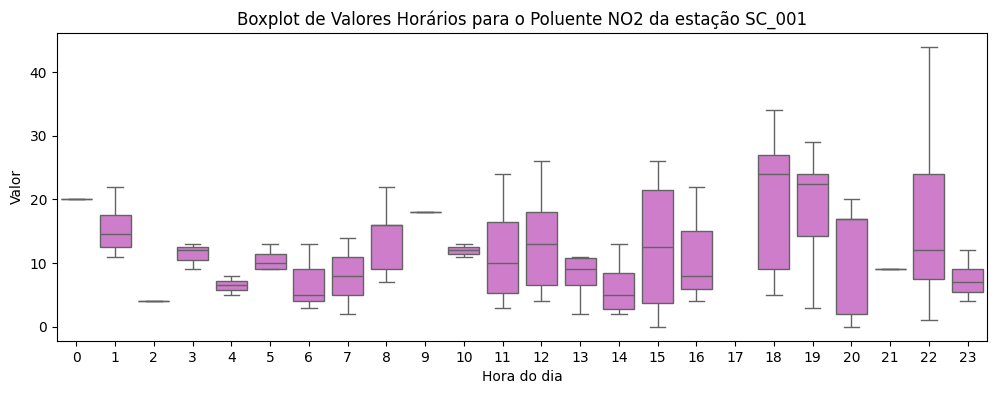

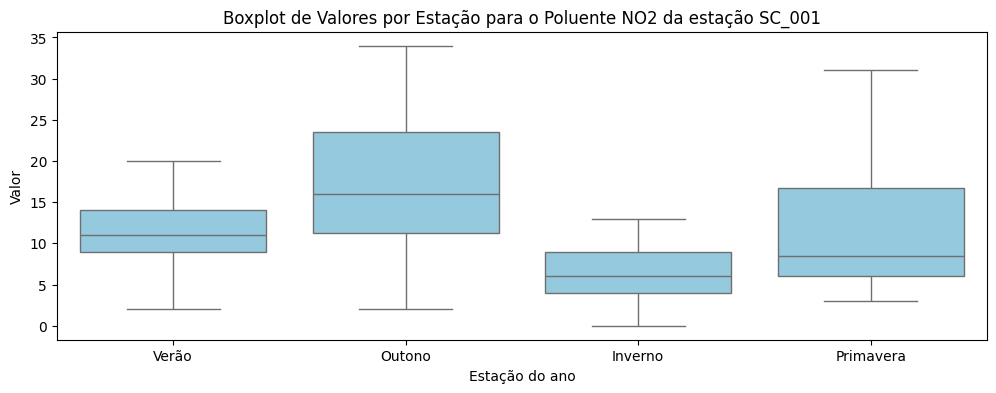

In [17]:
# Função para adicionar estações
def adicionar_estacoes(data):
    estacoes = {
        1: 'Verão', 2: 'Verão', 3: 'Verão',
        4: 'Outono', 5: 'Outono', 6: 'Outono',
        7: 'Inverno', 8: 'Inverno', 9: 'Inverno',
        10: 'Primavera', 11: 'Primavera', 12: 'Primavera'
    }
    data['Estacao'] = data['Mes'].map(estacoes)
    return data

# Atualizando os DataFrames e gerando boxplots
for codigo_estacao, df_estacao in filtred_dataframes.items():
    # Adicionando as estações
    df_estacao = adicionar_estacoes(df_estacao)

    # Boxplot mensal
    def plot_boxplot_mensal(data, poluente):
        fig, ax = plt.subplots()
        fig.set_size_inches((12, 4))
        sns.boxplot(x='Mes', y='Valor', data=data[data['Poluente'] == poluente], ax=ax, showfliers=False, color='#FF69B4')
        plt.xlabel('Mês do ano')
        plt.ylabel('Valor')
        plt.title(f'Boxplot de Valores Mensais para o Poluente {poluente} da estação {codigo_estacao}')
        plt.savefig(f'C:\\Users\\najuw\\OneDrive\\Documentos\\GitHub\\ENS410064\\2024\\figuras2\\boxplot_mensal_{codigo_estacao}_{poluente}.jpg', format='jpeg', dpi=300)
    
    # Boxplot horário
    def plot_boxplot_horario(data, poluente):
        fig, ax = plt.subplots()
        fig.set_size_inches((12, 4))
        sns.boxplot(x='Hora', y='Valor', data=data[data['Poluente'] == poluente], ax=ax, showfliers=False, color='#DA70D6')
        plt.xlabel('Hora do dia')
        plt.ylabel('Valor')
        plt.title(f'Boxplot de Valores Horários para o Poluente {poluente} da estação {codigo_estacao}')
        plt.savefig(f'C:\\Users\\najuw\\OneDrive\\Documentos\\GitHub\\ENS410064\\2024\\figuras2\\boxplot_hora_{codigo_estacao}_{poluente}.jpg', format='jpeg', dpi=300)

    # Boxplot por estação
    def plot_boxplot_estacao(data, poluente):
        fig, ax = plt.subplots()
        fig.set_size_inches((12, 4))
        sns.boxplot(x='Estacao', y='Valor', data=data[data['Poluente'] == poluente], ax=ax, showfliers=False, color='#87CEEB')
        plt.xlabel('Estação do ano')
        plt.ylabel('Valor')
        plt.title(f'Boxplot de Valores por Estação para o Poluente {poluente} da estação {codigo_estacao}')
        plt.savefig(f'C:\\Users\\najuw\\OneDrive\\Documentos\\GitHub\\ENS410064\\2024\\figuras2\\boxplot_estacao_{codigo_estacao}_{poluente}.jpg', format='jpeg', dpi=300)

    # Chamando a função para cada poluente
    for poluente in poluentes:
        plot_boxplot_mensal(df_estacao, poluente)
        plot_boxplot_horario(df_estacao, poluente)
        plot_boxplot_estacao(df_estacao, poluente)

## Estatísticas univariadas - Describe

In [18]:
# Função para calcular estatísticas descritivas
def descrever_valor(data, poluente):
    print(f'Estatísticas Descritivas para o Poluente {poluente} da estação {codigo_estacao} (µg/m³):')
    estatisticas = data['Valor'].describe()
    
    df = estatisticas.to_frame()
    df = df.rename(columns={'Valor': poluente}) 
    df = df.transpose()
    
    # Formatando a saída para apenas 2 casas decimais
    for indice, valor in estatisticas.items():
        print(f"{indice}: {valor:.2f}")
    print('\n')  # Linha em branco para melhor visualização

    return df

# DataFrame para armazenar resultados
df_resultados = pd.DataFrame(columns=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

# Gerar estatísticas descritivas para cada poluente e estação
for codigo_estacao, df_estacao in filtred_dataframes.items():
    for poluente in poluentes:
        df_poluente = df_estacao[df_estacao['Poluente'] == poluente]
        if not df_poluente.empty:
            estatisticas = descrever_valor(df_poluente, poluente)
            estatisticas['Estação'] = codigo_estacao  # Adiciona o código da estação
            estatisticas.index = [f"{poluente} ({codigo_estacao})"]  # Nomeia o índice
            df_resultados = pd.concat([df_resultados, estatisticas])

# Salvar resultados em um arquivo CSV
df_resultados.to_csv(r'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\tabelas2\estatisticas.csv')

Estatísticas Descritivas para o Poluente PTS da estação SC_002 (µg/m³):
count: 8720.00
mean: 29.45
std: 16.95
min: 4.00
25%: 19.00
50%: 26.00
75%: 35.00
max: 351.00


Estatísticas Descritivas para o Poluente SO2 da estação SC_002 (µg/m³):
count: 76.00
mean: 22.18
std: 60.65
min: 0.00
25%: 4.00
50%: 7.50
75%: 11.00
max: 394.00


Estatísticas Descritivas para o Poluente MP10 da estação SC_002 (µg/m³):
count: 8711.00
mean: 22.23
std: 12.76
min: 0.00
25%: 14.00
50%: 20.00
75%: 27.00
max: 260.00


Estatísticas Descritivas para o Poluente NO2 da estação SC_002 (µg/m³):
count: 62.00
mean: 9.89
std: 13.51
min: 0.00
25%: 3.25
50%: 6.50
75%: 10.00
max: 95.00


Estatísticas Descritivas para o Poluente PTS da estação SC_003 (µg/m³):
count: 5547.00
mean: 32.53
std: 22.71
min: 0.00
25%: 20.00
50%: 27.00
75%: 39.00
max: 449.00


Estatísticas Descritivas para o Poluente SO2 da estação SC_003 (µg/m³):
count: 61.00
mean: 16.80
std: 53.49
min: 0.00
25%: 2.00
50%: 4.00
75%: 10.00
max: 367.00


Estatística

C:\Users\najuw\AppData\Local\Temp\ipykernel_23300\1643221105.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_resultados = pd.concat([df_resultados, estatisticas])


##  Estatísticas univariadas nas horas do dia, dias da semana (segunda, terça, etc), mês do ano. - Describe 

In [19]:
## Função para calcular estatísticas descritivas mensais
def descrever_valor_mensal(data, poluente, codigo_estacao):
    # Agrupando os dados por mês
    mes_data = data.groupby('Mes')['Valor'].describe()
    
    # Formatando a saída para apenas 2 casas decimais
    print(f'Estatísticas Descritivas Mensais para o Poluente {poluente} (µg/m³) da Estação {codigo_estacao}:')
    print(mes_data.round(2))
    print('\n')  # Linha em branco para melhor visualização
    
    # Salvando em CSV
    mes_data.to_csv(rf'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\tabelas2\estatisticas_mensais_{poluente}_{codigo_estacao}.csv')
    return mes_data

# DataFrame para armazenar resultados
df_final = pd.DataFrame()

# Gerar estatísticas descritivas mensais para cada poluente e estação
for codigo_estacao, df_estacao in filtred_dataframes.items():
    for poluente in poluentes:
        df_poluente = df_estacao[df_estacao['Poluente'] == poluente]
        if not df_poluente.empty:
            estatisticas_mensais = descrever_valor_mensal(df_poluente, poluente, codigo_estacao)
            estatisticas_mensais['Estação'] = codigo_estacao  # Adiciona o código da estação
            estatisticas_mensais.index = [f"{poluente} ({codigo_estacao})"] * len(estatisticas_mensais)  # Nomeia o índice
            df_final = pd.concat([df_final, estatisticas_mensais])


## Função para calcular estatísticas descritivas horárias
def descrever_valor_hora(data, poluente, codigo_estacao):
    # Agrupando os dados por hora
    hora_data = data.groupby('Hora')['Valor'].describe()
    
    # Formatando a saída para apenas 2 casas decimais
    print(f'Estatísticas Descritivas Horárias para o Poluente {poluente} (µg/m³) da Estação {codigo_estacao}:')
    print(hora_data.round(2))
    print('\n')  # Linha em branco para melhor visualização
    
    # Salvando em CSV
    hora_data.to_csv(rf'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\tabelas2\estatisticas_hora_{poluente}_{codigo_estacao}.csv')
    return hora_data

# DataFrame para armazenar resultados
df_final = pd.DataFrame()

# Gerar estatísticas descritivas horárias para cada poluente e estação
for codigo_estacao, df_estacao in filtred_dataframes.items():
    for poluente in poluentes:
        df_poluente = df_estacao[df_estacao['Poluente'] == poluente]
        if not df_poluente.empty:
            estatisticas_horarias = descrever_valor_hora(df_poluente, poluente, codigo_estacao)
            estatisticas_horarias['Estação'] = codigo_estacao  # Adiciona o código da estação
            estatisticas_horarias.index = [f"{poluente} ({codigo_estacao})"] * len(estatisticas_horarias)  # Nomeia o índice
            df_final = pd.concat([df_final, estatisticas_horarias])


### Função para calcular estatísticas descritivas por dia da semana
def descrever_valor_dia(data, poluente, codigo_estacao):
    # Agrupando os dados por dia da semana
    dia_data = data.groupby('Dia_da_Semana')['Valor'].describe()

    ordem_dias = ["Seg", "Ter", "Qua", "Qui", "Sex", "Sáb", "Dom"]

    # Aplicar a ordem ao índice do DataFrame
    dia_data.index = pd.Categorical(dia_data.index, categories=ordem_dias, ordered=True)

    # Ordenar o DataFrame com base na nova ordem do índice
    df = dia_data.sort_index()

    # Formatando a saída para apenas 2 casas decimais
    print(f'Estatísticas Descritivas dos Dias da Semana para o Poluente {poluente} (µg/m³) da Estação {codigo_estacao}:')
    print(df.round(2))
    print('\n')  # Linha em branco para melhor visualização

    # Salvando em CSV
    df.to_csv(rf'C:\Users\najuw\OneDrive\Documentos\GitHub\ENS410064\2024\tabelas2\estatisticas_dia_{poluente}_{codigo_estacao}.csv')

    return df

# DataFrame para armazenar resultados
df_final = pd.DataFrame()

# Gerar estatísticas descritivas para cada poluente e estação
for codigo_estacao, df_estacao in filtred_dataframes.items():
    for poluente in poluentes:
        df_poluente = df_estacao[df_estacao['Poluente'] == poluente]
        if not df_poluente.empty:
            estatisticas_dia = descrever_valor_dia(df_poluente, poluente, codigo_estacao)
            estatisticas_dia['Estação'] = codigo_estacao  # Adiciona o código da estação
            estatisticas_dia.index = [f"{poluente} ({codigo_estacao})"] * len(estatisticas_dia)  # Nomeia o índice
            df_final = pd.concat([df_final, estatisticas_dia])

Estatísticas Descritivas Mensais para o Poluente PTS (µg/m³) da Estação SC_002:
     count   mean    std  min   25%   50%   75%    max
Mes                                                   
1    740.0  27.44   9.48  9.0  21.0  26.0  33.0   99.0
2    665.0  29.64  16.24  7.0  22.0  27.0  35.0  351.0
3    744.0  29.53  13.97  8.0  20.0  26.0  35.0  112.0
4    720.0  28.64  14.48  7.0  19.0  24.0  36.0  118.0
5    743.0  31.69  13.57  9.0  22.0  29.0  38.0   98.0
6    720.0  32.57  19.77  7.0  20.0  27.0  41.0  155.0
7    743.0  33.73  21.41  4.0  22.0  29.0  40.0  318.0
8    744.0  40.99  27.10  4.0  25.0  34.0  48.0  283.0
9    720.0  31.08  16.75  7.0  19.0  28.0  38.0  190.0
10   744.0  20.80   8.79  5.0  14.0  19.0  26.0   69.0
11   720.0  24.41  10.97  8.0  17.0  22.0  29.0  106.0
12   717.0  22.58  10.62  7.0  16.0  20.0  26.0  124.0


Estatísticas Descritivas Mensais para o Poluente SO2 (µg/m³) da Estação SC_002:
     count   mean     std  min    25%   50%    75%    max
Mes       

## Mann-Kendall

In [21]:
## Mann-Kendal mês a mês
# Lista de poluentes
poluentes = ['PTS', 'SO2', 'MP10', 'NO2']

# Resultado do teste
resultados_totais = {}

for codigo_estacao, df_estacao in filtred_dataframes.items():
    resultados = {}

    for poluente in poluentes:
        # Filtrando os dados do poluente
        dff = df_estacao[df_estacao['Poluente'] == poluente]

        # Resampling para calcular a média mensal
        mensal = dff['Valor'].resample('ME').mean()

        # Executando o teste de Mann-Kendall
        resultado = mk.original_test(mensal)

        resultados[poluente] = {
            'T Estatística': resultado.Tau,
            'P-valor': resultado.p,
            'Significância': resultado.h,
            'Pendência': resultado.s
        }

    resultados_totais[codigo_estacao] = resultados

# Exibindo os resultados
for codigo_estacao, resultados in resultados_totais.items():
    print(f'Estação: {codigo_estacao}')
    for poluente, resultado in resultados.items():
        print(f'  Poluente: {poluente}')
        print(f"  T Estatística: {resultado['T Estatística']}")
        print(f"  P-valor: {resultado['P-valor']}")
        print(f"  Significância: {resultado['Significância']}")
        print(f"  Pendência: {resultado['Pendência']}")
        print('\n')


## Mann-Kendall dia a dia
# Lista de poluentes
poluentes = ['PTS', 'SO2', 'MP10', 'NO2']

# Resultado do teste
resultados_totais = {}

for codigo_estacao, df_estacao in filtred_dataframes.items():
    resultados = {}

    for poluente in poluentes:
        # Filtrando os dados do poluente
        dff = df_estacao[df_estacao['Poluente'] == poluente]

        # Resampling para calcular a média diária
        diario = dff['Valor'].resample('D').mean()

        # Executando o teste de Mann-Kendall
        resultado = mk.original_test(diario)

        # Armazenando os resultados
        resultados[poluente] = {
            'Tau': resultado.Tau,
            'P-valor': resultado.p,
            'Significância': resultado.h,
            'Pendência': resultado.s
        }

    resultados_totais[codigo_estacao] = resultados

# Exibindo os resultados
for codigo_estacao, resultados in resultados_totais.items():
    print(f'Estação: {codigo_estacao}')
    for poluente, resultado in resultados.items():
        print(f'  Poluente: {poluente}')
        print(f"  Tau: {resultado['Tau']}")
        print(f"  P-valor: {resultado['P-valor']}")
        print(f"  Significância: {resultado['Significância']}")
        print(f"  Pontuação: {resultado['Pendência']}")
        print('\n')

Estação: SC_002
  Poluente: PTS
  T Estatística: -0.06060606060606061
  P-valor: 0.837011475105446
  Significância: False
  Pendência: -4.0


  Poluente: SO2
  T Estatística: 0.41818181818181815
  P-valor: 0.0867681727038756
  Significância: False
  Pendência: 23.0


  Poluente: MP10
  T Estatística: -0.18181818181818182
  P-valor: 0.4506702853141802
  Significância: False
  Pendência: -12.0


  Poluente: NO2
  T Estatística: 0.06666666666666667
  P-valor: 0.8580276569875211
  Significância: False
  Pendência: 3.0


Estação: SC_003
  Poluente: PTS
  T Estatística: 0.3333333333333333
  P-valor: 0.2514521865080219
  Significância: False
  Pendência: 12.0


  Poluente: SO2
  T Estatística: 0.1388888888888889
  P-valor: 0.6749867139704893
  Significância: False
  Pendência: 5.0


  Poluente: MP10
  T Estatística: 0.24444444444444444
  P-valor: 0.37109336952269745
  Significância: False
  Pendência: 11.0


  Poluente: NO2
  T Estatística: -0.6
  P-valor: 0.13285495573105388
  Significância: